<a href="https://colab.research.google.com/github/ZahraBarati99/Computational-Fundamentals-of-Regression-Stability-and-Scalability/blob/main/CMD3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1

In [2]:
np.random.seed (42)

In [3]:
# A =  X  1
A = np.array([
    [1, 2.0],
    [1, 3.0],
    [1, 4.5],
    [1, 5.5],
])

# y =
y = np.array([
    [3.1],
    [4.9],
    [8.2],
    [10.1],
])

m = len(y)
print("m =", m)

m = 4


1.1 (Equations Normal)

In [4]:
theta_Normal = np.linalg.inv(A.T @ A) @ (A.T @ y)

print("theta Normal =\n", theta_Normal)

theta Normal =
 [[-1.04137931]
 [ 2.03103448]]


1.2 (BGⅮ)

In [5]:
learning_rate = 0.01
n_iterations = 1000

theta_BGD = np.zeros((A.shape[1], 1))
Jteta_Values = []

for i in range(n_iterations):
    gradient = (1/m) * A.T @ (A @ theta_BGD - y)
    theta_BGD -= learning_rate * gradient
    Jteta = (1/(2*m)) * np.sum((A @ theta_BGD - y)**2)
    Jteta_Values.append(Jteta)

print("theta BGD =\n", theta_BGD)
print("\nJteta Values =", Jteta_Values[-1])

theta BGD =
 [[-0.55217831]
 [ 1.9146829 ]]

Jteta Values = 0.01873147001124011


1.3 (SVD)

In [6]:
U, S, Vh = np.linalg.svd(A, full_matrices=False)
S_plus = np.diag(1 / S)
A_plus = Vh.T @ S_plus @ U.T
theta_SVD = A_plus @ y

print("theta SVD =\n", theta_SVD)


theta SVD =
 [[-1.04137931]
 [ 2.03103448]]


1.4.2 (A new matrix with strong collinearity)

In [7]:
noise = np.random.rand(m, 1) * 0.0001
#noise = 0
A_collinear = np.hstack((A, A[:, [1]] + noise))

In [8]:
print(noise)

[[3.74540119e-05]
 [9.50714306e-05]
 [7.31993942e-05]
 [5.98658484e-05]]


1.4.3

In [9]:
theta_Normal_collinear = np.linalg.inv(A_collinear.T @ A_collinear) @ (A_collinear.T @ y)
print("theta Normal collinear =\n", theta_Normal_collinear)

theta Normal collinear =
 [[-8.53782625e-01]
 [ 3.43827452e+03]
 [-3.43623267e+03]]


1.4.4

In [10]:
U_collinear, S_collinear, Vh_collinear = np.linalg.svd(A_collinear, full_matrices=False)
S_plus_collinear = np.diag(1 / S_collinear)
A_plus_collinear = Vh_collinear.T @ S_plus_collinear @ U_collinear.T

theta_SVD_collinear = A_plus_collinear @ y
print("theta SVD collinear =\n", theta_SVD_collinear)

theta SVD collinear =
 [[-8.53775599e-01]
 [ 3.43826298e+03]
 [-3.43622113e+03]]


2

1.2

In [11]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

column_names = [
    'MPG', 'Cylinders', 'Displacement', 'Horsepower',
    'Weight', 'Acceleration', 'ModelYear', 'Origin',
    'CarName']

data_mpg = pd.read_csv(url, names=column_names,
                       na_values='?', delim_whitespace=True)

data_mpg = data_mpg.dropna(subset=['Horsepower'])

data_mpg['Horsepower'] = data_mpg['Horsepower'].astype(float)

data_mpg.head()

/tmp/ipython-input-403284665.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_mpg = pd.read_csv(url, names=column_names,


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin,CarName
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


2.2

In [12]:
# y = MPG
y = data_mpg['MPG'].values.reshape(-1, 1)

# x = Horsepower
x = data_mpg['Horsepower'].values.reshape(-1, 1)

# Standardization
x_mean = np.mean(x)
x_std  = np.std(x)

x_norm = (x - x_mean) / x_std

# A
A = np.hstack([np.ones_like(x_norm), x_norm])

m = len(y)

2.3

2.3.1

In [13]:
learning_rate = 0.01
n_iterations_SGD = 5000

theta_SGD = np.zeros((A.shape[1], 1))

J_values_SGD = []

for it in range(n_iterations_SGD):

    i = np.random.randint(m)
    Ai = A[i].reshape(1, -1)
    yi = y[i]

    gradient_i = Ai.T @ (Ai @ theta_SGD - yi)

    theta_SGD -= learning_rate * gradient_i

    J = (1/(2*m)) * np.sum((A @ theta_SGD - y)**2)
    J_values_SGD.append(J)

print("theta SGD=\n", theta_SGD)
print("\nJ values SGD=\n", J_values_SGD[-1])

theta SGD=
 [[22.5832758 ]
 [-6.51916008]]

J values SGD=
 12.44573785086935


2.3.2

In [14]:
learning_rate = 0.01
n_iterations_BGD = 1000

theta_BGD = np.zeros((A.shape[1], 1))

J_values_BGD = []

for it in range(n_iterations_BGD):

    gradient = (1/m) * (A.T @ (A @ theta_BGD - y))

    theta_BGD -= learning_rate * gradient

    J = (1/(2*m)) * np.sum((A @ theta_BGD - y)**2)
    J_values_BGD.append(J)

print("theta BGD=\n", theta_BGD)
print("\nJ values BGD=\n", J_values_BGD[-1])

theta BGD=
 [[23.44490618]
 [-6.06761045]]

J values BGD=
 11.971832015876284


2.4

2.4.1

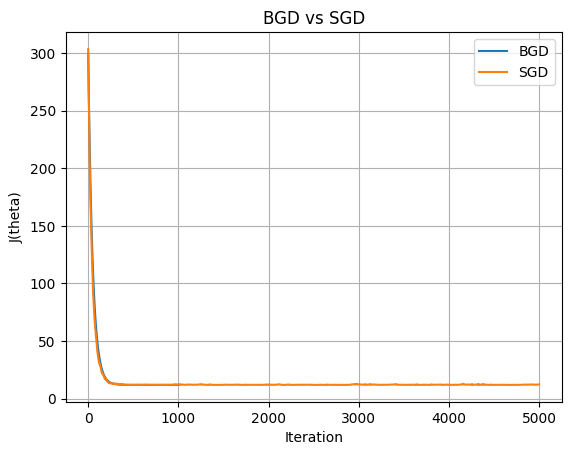

In [15]:
plt.plot(range(len(J_values_BGD)), J_values_BGD, label='BGD')
plt.plot(range(len(J_values_SGD)), J_values_SGD, label='SGD')
#plt.yscale('log')

plt.xlabel('Iteration')
plt.ylabel('J(theta)')
plt.title('BGD vs SGD')
plt.legend()
plt.grid(True)
plt.show()

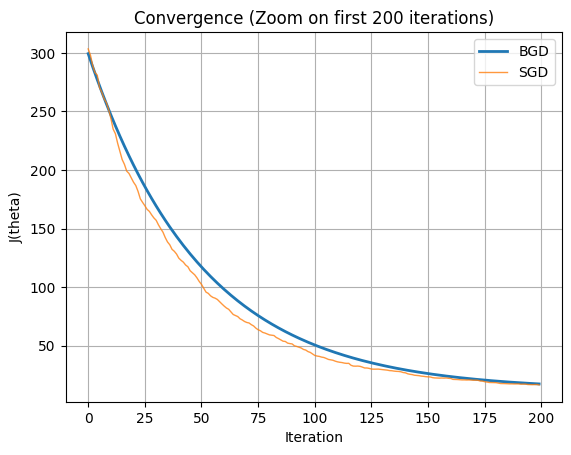

In [16]:
J_BGD = np.array(J_values_BGD)
J_SGD = np.array(J_values_SGD)

max_iter_zoom = 200

plt.plot(range(max_iter_zoom), J_BGD[:max_iter_zoom],
         label='BGD', linewidth=2)

plt.plot(range(max_iter_zoom), J_SGD[:max_iter_zoom],
         label='SGD', linewidth=1, alpha=0.8)

plt.xlabel('Iteration')
plt.ylabel('J(theta)')
plt.title('Convergence (Zoom on first 200 iterations)')
plt.legend()
plt.grid(True)
plt.show()

3

3.1

3.1.2

In [17]:
x1 = x
x2 = x**2

x1_mean, x1_std = x1.mean(), x1.std()
x2_mean, x2_std = x2.mean(), x2.std()

x1_norm = (x1 - x1_mean) / x1_std
x2_norm = (x2 - x2_mean) / x2_std

A_poly = np.hstack([np.ones_like(x1), x1_norm, x2_norm])

y = data_mpg['MPG'].values.reshape(-1, 1)

3.1.3

In [18]:
m, n = A_poly.shape

learning_rate = 0.01
n_iterations_SGD_poly = 5000

theta_poly = np.zeros((n, 1))
J_values_SGD_poly = []

for it in range(n_iterations_SGD_poly):

    i = np.random.randint(m)
    Ai = A_poly[i].reshape(1, -1)
    yi = y[i]

    gradient_i = Ai.T @ (Ai @ theta_poly - yi)

    theta_poly -= learning_rate * gradient_i

    J = (1/(2*m)) * np.sum((A_poly @ theta_poly - y)**2)
    J_values_SGD_poly.append(J)
print("theta_poly=\n", theta_poly)
print("\nJ values SGD poly=", J_values_SGD_poly[-1])

theta_poly=
 [[ 23.58374317]
 [-11.55644909]
 [  5.95990338]]

J values SGD poly= 10.204345850795297


3.1.4

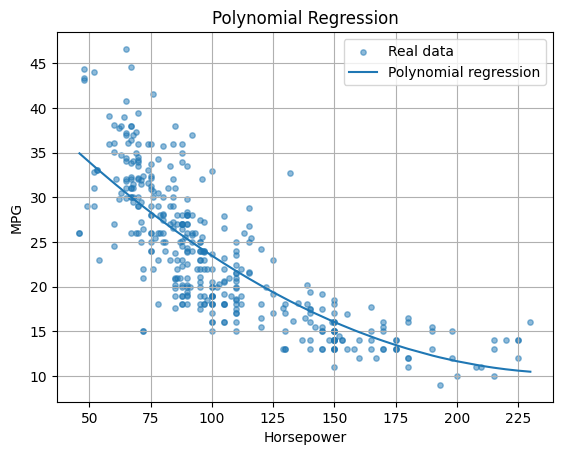

In [19]:
x_raw = data_mpg['Horsepower'].values.reshape(-1, 1)
y_raw = data_mpg['MPG'].values.reshape(-1, 1)

x1_norm = (x_raw - x1_mean) / x1_std
x2_norm = (x_raw**2 - x2_mean) / x2_std

y_pred_poly = theta_poly[0] + theta_poly[1] * x1_norm + theta_poly[2] * x2_norm

plt.scatter(x_raw, y_raw, s=15, alpha=0.5, label='Real data')

sorted_idx = np.argsort(x_raw[:, 0])
plt.plot(x_raw[sorted_idx], y_pred_poly[sorted_idx], label='Polynomial regression')

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()
